# Predicting House Price 🏠

🎯 In this challenge, you will **predict the sale price** of houses (`SalePrice`) according to the *surface*, the *number of bedrooms* or the *overall quality*.

## Load Python Libraries

Run the cell below to `import` some Python libraries - these will be our tools for working with data 📊


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

--------------

## Load the Dataset

👇 Run the cell below to load the `house_prices.csv` dataset into this notebook as a pandas `DataFrame`, and display its first 5 rows.

*Note: the datasets has been cleaned and federated for learning purposes*

In [2]:
houses = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/house-prices.csv')
houses.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual,SalePrice
0,1710,3,1,7,208500
1,1262,3,1,6,181500
2,1786,3,1,7,223500
3,1717,3,1,7,140000
4,2198,4,1,8,250000


This dataset contains information about houses sold.

The *columns* in the given dataset are as follows:

*Features:*
- `GrLivArea`: Surface in squared feet
- `BedroomAbvGr`: Number of bedrooms
- `KitchenAbvGr`: Number of kitchens
- `OverallQual`: Overall quality (1: Very Poor / 10: Very Excellent)

*Target:*
- `SalePrice`: Sale price in USD

--------------

## We can get a lot of insight without ML! 🤔

### Your turn! 🚀

Let's start by **understanding the data we have** - how big is the dataset, what is the information (columns) we have and so on:

**💡 Tip:** remember to check the slides for the right methods ;)

In [3]:
# your code here
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1759 non-null   int64
 1   BedroomAbvGr  1759 non-null   int64
 2   KitchenAbvGr  1759 non-null   int64
 3   OverallQual   1759 non-null   int64
 4   SalePrice     1759 non-null   int64
dtypes: int64(5)
memory usage: 68.8 KB


Now try to **separate only some columns** - say we only want to see `SalePrice`, or `GrLivArea` and `BedroomAbvGr`:

In [5]:
# your code here
houses[['SalePrice', 'GrLivArea', 'BedroomAbvGr']]

,SalePrice,GrLivArea,BedroomAbvGr
0,208500,1710,3
1,181500,1262,3
2,223500,1786,3
3,140000,1717,3
4,250000,2198,4
...,...,...,...
1754,210000,2073,3
1755,155000,1125,2
1756,173000,1640,3
1757,104000,2229,5


-------

### Your turn - Now let's do some **visualization** 📊. 


Let's follow some basic intuition - **does the surface (`GrLivArea`) affects the price of the house(`SalePrice`)❓**

Let's use a [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - a method inside the Seaborn library (which we imported above and shortened to `sns`) that gives us a graph with data points as dots with `x` and `y` values.

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

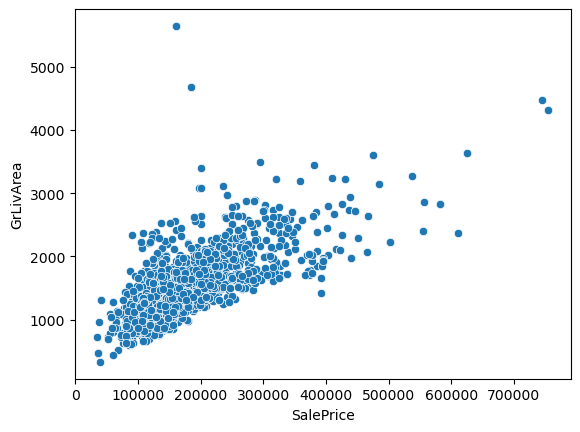

In [12]:
# your code here
sns.scatterplot(data=houses, y="GrLivArea", x="SalePrice")

Does the **overall quality (`OverallQual`) has an impact on the `SalePrice` ❓**

**💡Tip:** You can add a `hue` to the previous graph

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

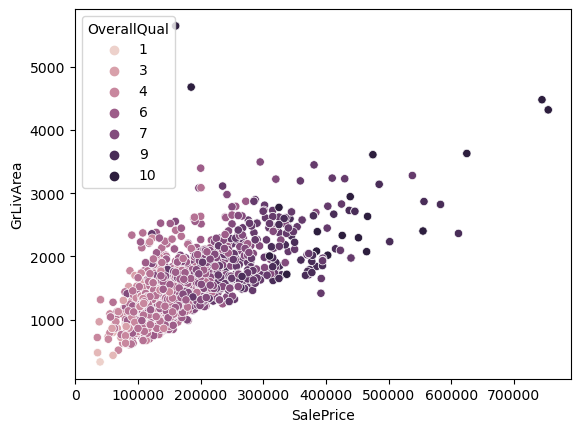

In [14]:
# your code here
sns.scatterplot(data=houses, y="GrLivArea", x="SalePrice", hue="OverallQual")

Let's also understand the repartition we have for some features:

- **What is the repartition of the Number of bedrooms❓**
- **What is the repartition of the Number of kitchens❓**

Seaborn `countplot` is here to help with that.

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

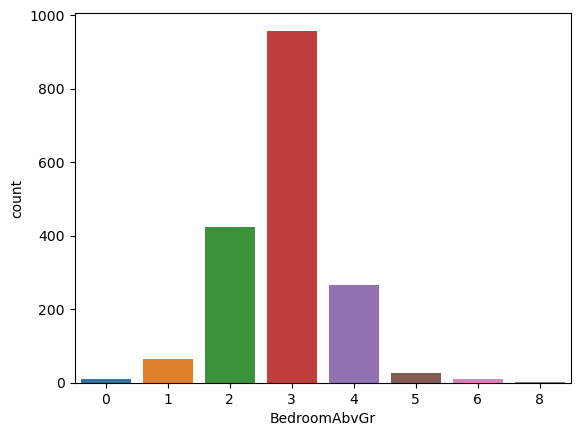

In [16]:
# your code here
sns.countplot(x=houses["BedroomAbvGr"])


<AxesSubplot:xlabel='KitchenAbvGr', ylabel='count'>

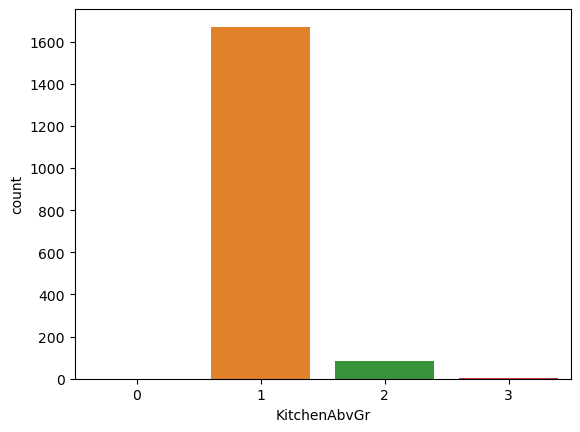

In [17]:
sns.countplot(x=houses["KitchenAbvGr"])

--------------

## Your first model - Linear Regression 📈

**1.** First, let's create what will be our features and our target.

Create a variable `features` containing all features:

In [18]:
# your code here
features = houses[['GrLivArea', 'BedroomAbvGr','KitchenAbvGr','OverallQual']]

Create a variable `target` containing the target:

In [19]:
# your code here
target = houses[['SalePrice']]

Feel free to check what is in your `features` and `target` below:

In [21]:
# your code here
print(features.head())
print(target.head())

   GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallQual
0       1710             3             1            7
1       1262             3             1            6
2       1786             3             1            7
3       1717             3             1            7
4       2198             4             1            8
   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


--------------

**2.** Time to **import** the *sklearn* function to split our dataset into a train and a test set

Try to find the right function [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [22]:
# your code here
from sklearn.model_selection import train_test_split


--------------

**3.** Use this function to create **X_train, X_test, y_train, y_test**

🚨 Set `random_state=42` as an argument of the function.

In [24]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

Let's check what is in your `X_train`, `X_test`, `y_train`, `y_test`:

- What percentage of the observations were allocated to the train and the test set?
- How many features in `X_train` and `X_test`?

In [27]:
# your code here
print(y_train)
print(y_test)
print(X_train)
print(X_test)
#train set has 75% of the original dataset, and test set has 25% of the original dataset
#they both have 4 features.

      SalePrice
1027     105000
842      141000
757      179400
218      167240
1131     117500
...         ...
1130      93500
1294     138500
860      131500
1459     131400
1126     259000

[1319 rows x 1 columns]
      SalePrice
1125     174000
1030     197000
1450     287090
1494     182000
344      140200
...         ...
1198     148000
1713     164500
1175     119500
1211     113000
481      155000

[440 rows x 1 columns]
      GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallQual
1027       1376             3             1            5
842        1800             6             2            5
757        1501             3             1            7
218        1248             2             1            7
1131       2210             5             1            6
...         ...           ...           ...          ...
1130        974             3             1            5
1294       1052             3             1            5
860        1039             3             1           

--------------

**4.** Time to **import** the Linear Regression model

Python libraries like [Scikit-learn](https://scikit-learn.org/0.21/modules/classes.html) make it super easy for people getting into Data Science and ML to experiment.

The code is already in the library, it's just about **calling the right methods!** 🛠

In [28]:
# your code here
from sklearn.linear_model import LinearRegression

Now to **initialize** the model. Store it in a variable `model`:

In [29]:
# your code here
model = LinearRegression()

--------------

**5. Train** the model on the **training set**. 

This is the process where the Linear Regression model looks for a line that best fits all the points in the dataset. This is the part where the computer is hard at work **learning**! 🤖

In [30]:
# your code here
model.fit(X_train, y_train)

LinearRegression()

--------------

**6. Evaluate** the performance of the model on the **test set**.

Models can have different default scoring metrics. Linear Regression by default uses something called `R-squared` - a metric that shows how much of change in the target (`SalePrice`) can be explained by the changes in features (`GrLivArea`, `BedroomAbvGr`, `KitchenAbvGr` and `OverallQual`)

In [31]:
# your code here
model.score(X_train, y_train)

0.7261579164933416

⚠️ **Careful not to confuse this with accuracy**. The above number is shows that **"the inputs we have can help us predict this percentage of change in the depreciation"** Which is decent considering we did with just a few lines of code! 

Let's **compare** this score to the one the model gets on the **training set**:

In [32]:
# your code here
model.score(X_test, y_test)

0.6867680844882272

👉 You should get a slightly higher score on the training set, which is to be expected in general.

The good news is that the 2 scores are relatively close to each other, which shows that we achieved a **good balance**, our model **generalises well to new observations**, explaining more than 70% of change in depreciation.

**Splitting the dataset into a training set and a test set is essential in Machine Learning**. It allows us to **identify**:
- **Overfitting**: we would see a large difference between the 2 scores. The model would be very good on the data it trained on, but would be doing poorly on the test set.
- **Underfitting**: we would have bad score on both the training data and on the test data. In this case, a reason could be that the model is not complex enough to capture the patterns in the data.

In our case, we have a **robust model** that does well on new observations💪. We can now use it to make predictions on new houses with confidence.

--------------

**7.** Let's **predict** the price of a new house 🔮

This new house has a the following characteristics:
- **Surface** of 3,000 squared feet
- 3 **bedrooms**
- 1 **kitchen**
- **Overall quality** score of 5

**7.1** Start by creating variable `new_house` in which you will store those characteristics. Make sure to use the right format to be able to make a prediction.

*Note: here is a reminder of the columns in the table:* `['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']`


<details>
    <summary>💡Hint</summary>
<p> 
<pre>
`new_house` should be a `list of list`:
    [[surface, nb_bedrooms, nb_kitchens, overall_quality]]
</pre>
</details>

In [40]:
# your code here
new_house = np.array([[3000,3,1,5]])

**7.2** Now use the right method to make a prediction using the model we just trained:

In [41]:
# your code here
model.predict(new_house)

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[250739.40897715]])

Now let's say we have another house with the same characteristics, except for the overall quality score being 9. 

**What would be the price of this house❓**

In [42]:
# your code here
another_house = np.array([[3000,3,1,9]])
model.predict(another_house)

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[373362.59725533]])

--------------

**8.** **Explaining** the model

Linear Regression is a [linear model](https://scikit-learn.org/stable/modules/linear_model.html), so it's explainability is quite high.

**8.1.** We can check the `coef_` or the **coefficients** of the model. These explain how much the target (`SalePrice`) changes with a change of `1` in each of the features (inputs), while holding other features constant.

In [44]:
# your code here
model.coef_

array([[    69.70950885, -12154.48605308, -22959.87354252,
         30655.79706955]])

🤔 We'd need to check the column order again, to know which number is which input. But, **we got you covered!** Run the cell below:

In [43]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,GrLivArea,69.709509
1,BedroomAbvGr,-12154.486053
2,KitchenAbvGr,-22959.873543
3,OverallQual,30655.797070


**8.2** The other thing we can check is the **intercept** of the model. This is the target (`SalePrice`) for when all inputs are 0. So this should be close to a new house with a surface of 0 squared feet, no bedrooms, no kitchens and an overall quality of 0:

In [45]:
# your code here
model.intercept_

array([-52244.77120892])

In [46]:
another_house = np.array([[0,0,0,0]])
model.predict(another_house)

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-52244.77120892]])